In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os

## Preguntas a responder con gráficas
¿En qué regiones del país llueve más o llueve menos?
¿en qué regiones se llegan a las temperaturas mas altas?
¿regiones de la diferencia entre temperatura mínima y máxima a lo largo del año? (donde cambia más la temperatura?)
En los lugares más cálidos, ¿cuánto llueve?
¿Está relacionada la lluvia con la temperatura?
¿donde no llueve hace más calor o frío?
¿Cuántos medidores hay en el norte del país? (comparación)
¿En qué región hay mayor densidad de medidores?
¿Está relacionada la costa con alguna característica?



Proporcion entre Sueldo Base y Apoyo Familiar
Proporcion entre Sueldo Base y Gratificación Quincenal
Cuánto se gana de prima vacacional mas aguinaldo




¿Cómo se relaciona la lluvia con la temperatura?
Respuesta: Hay tendencia a que los lugares donde más llueve se alcanzan temperaturas máximas.




Se leen los archivos que contienen la información de temperaturas y lluvia de los meses septiembre, octubre y noviembre del 2019. Se muestra el tamaño de cada tabla.

In [92]:
lluv1909=pd.read_csv("../Semana2/lluv1909.csv")
lluv1910=pd.read_csv("../Semana2/lluv1910.csv")
lluv1911=pd.read_csv("../Semana2/lluv1911.csv")
lluv1912=pd.read_csv("../Semana2/lluv1912.csv")

tmax09=pd.read_csv("../Semana2/201909010000TMax.csv")
tmax10=pd.read_csv("../Semana2/201910010000TMax.csv")
tmax11=pd.read_csv("../Semana2/201911010000TMax.csv")
tmed09=pd.read_csv("../Semana2/201909010000TMed.csv")
tmed10=pd.read_csv("../Semana2/201910010000TMed.csv")
tmed11=pd.read_csv("../Semana2/201911010000TMed.csv")
tmin09=pd.read_csv("../Semana2/201909010000TMin.csv")
tmin10=pd.read_csv("../Semana2/201910010000TMin.csv")
tmin11=pd.read_csv("../Semana2/201911010000TMin.csv")

print('Tamaños de dataframes')
print('lluv1909:', lluv1909.shape)
print('lluv1910:', lluv1910.shape)
print('lluv1911:', lluv1911.shape)

print('tmax09:', tmax09.shape) #SEPTIEMBRE
print('tmax10:', tmax10.shape) #OCTUBRE
print('tmax11:', tmax11.shape) #NOVIEMBRE
print('tmed09:', tmed09.shape)
print('tmed10:', tmed10.shape)
print('tmed11:', tmed11.shape)
print('tmin09:', tmin09.shape)
print('tmin10:', tmin10.shape)
print('tmin11:', tmin11.shape)
lluv1912

Tamaños de dataframes
lluv1909: (1541, 6)
lluv1910: (1566, 6)
lluv1911: (1653, 6)
tmax09: (1267, 6)
tmax10: (1197, 6)
tmax11: (1292, 6)
tmed09: (1267, 6)
tmed10: (1197, 6)
tmed11: (1292, 6)
tmin09: (1267, 6)
tmin10: (1197, 6)
tmin11: (1292, 6)


,LON,LAT,EDO,CLAVE,ESTACION,dic-19
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",19.70
1,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",5.78
2,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",7.00
3,-102.295000,22.165000,AGS,CEPAB,"Campo Experimental Pabell�n, Ags. INIFAP*",11.80
4,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",20.90
5,-102.296667,22.362778,AGS,CSOAG,"Cos�o, Ags.",27.01
6,-102.254722,22.123333,AGS,DONPRIMO,"Don Primo, Ags. INIFAP*",12.20
7,-102.259167,21.864722,AGS,ELCEDAZO,"El Cedazo, Ags. INIFAP*",19.80
8,-102.705833,21.744167,AGS,ELLAUREL,"El Laurel, Ags. INIFAP*",12.40
9,-102.291667,22.363611,AGS,ELPOTRERITO,"El Potrerito, Ags. INIFAP*",19.00


Con ayuda del comando merge se pueden unir bases de datos desechando aquellos que están fuera de la intersección. Se tienen los datos de temperaturas mínimas, medias y máximas de 3 meses. Primero se crean 3 tablas, una para cada mes, uniendo con el comando pd.merge las bases de datos correspondientes a la temperatura mínima, media y máxima de cada mes. Después, estas tres tablas se unen para formar la tabla llamada 'merget'.

In [93]:
mergedt09=pd.merge(pd.merge(tmin09,tmed09),tmax09)
mergedt09.index=range(1,mergedt09.shape[0]+1)
mergedt09=mergedt09.rename(columns={'Est':'Estación','Tmin':'SEPTMin','Tmed':'SEPTMed','Tmax':'SEPTMax'})

mergedt10=pd.merge(pd.merge(tmin10,tmed10),tmax10)
mergedt10.index=range(1,mergedt10.shape[0]+1)
mergedt10=mergedt10.rename(columns={'Est':'Estación','Tmin':'OCTTMin','Tmed':'OCTTMed','Tmax':'OCTTMax'})

mergedt11=pd.merge(pd.merge(tmin11,tmed11),tmax11)
mergedt11.index=range(1,mergedt11.shape[0]+1)
mergedt11=mergedt11.rename(columns={'Est':'Estación','Tmin':'NOVTMin','Tmed':'NOVTMed','Tmax':'NOVTMax'})

mergedt=pd.merge(pd.merge(mergedt09,mergedt10),mergedt11)



Se unieron los datos de las tablas de lluvia usando el mismo comando pd.merge y se forma el dataframe llamado mergedlluv. Se renombran los nombres de las columnas para identificarlos con mayor facilidad

In [94]:
mergedlluv=pd.merge(pd.merge(lluv1909,lluv1910),lluv1911)
mergedlluv=mergedlluv.rename(columns={'CLAVE':'Clave','SEP':'SEPlluv','oct-19':'OCTlluv','nov-19':'NOVlluv'})

               

Se calcula la cantidad de filas que coinciden por la columna 'Clave', en total coinciden 955.

In [95]:
intersection=pd.Series(list(set(mergedlluv['Clave']) & set(mergedt['Clave'])))
intersection.shape



(955,)

Se hace un recorte de la tabla original mergedlluv para que el único criterio para unir las tablas de lluvia y temperatura mediante el comando pd.merge sea la columna 'Clave'.

In [96]:
recortelluv=pd.concat([mergedlluv['Clave'], mergedlluv[['SEPlluv','OCTlluv','NOVlluv']]], axis=1)
lluv1912=lluv1912.rename(columns={'CLAVE':'Clave'})

lluv1912=pd.merge(mergedt,lluv1912)
lluv1912.shape

(917, 19)

Se unen los dataframes de temperatura con el recorte del dataframe de lluvia.

In [97]:
db=pd.merge(mergedt,recortelluv)


Se reordenan las columnas con el fin de agrupar los datos por mes.

In [98]:
cols = db.columns.tolist()
cols = cols[:8] + cols[-3:-2] + cols[8:11] + cols[-2:-1] + cols[11:14] + cols[-1:]
db=db[cols]


In [103]:
db

,Lon,Lat,Clave,Edo,Estación,SEPTMin,SEPTMed,SEPTMax,SEPlluv,OCTTMin,OCTTMed,OCTTMax,OCTlluv,NOVTMin,NOVTMed,NOVTMax,NOVlluv
0,-102.37,21.78,NGRAG,AGS,El Niagara Ags.,13.2,20.5,27.9,83.11,12.3,19.5,26.8,63.90,9.5,17.9,26.3,24.9
1,-102.79,21.81,MNLAG,AGS,Media Luna Ags.,14.2,22.0,29.8,83.63,12.9,20.6,28.2,27.22,10.4,19.0,27.6,34.4
2,-102.71,21.85,CALVILLO,AGS,Calvillo Ags. SMN*,14.7,22.5,30.2,54.97,13.3,21.5,29.7,22.23,10.6,19.2,27.7,29.8
3,-102.29,21.85,OBSAG,AGS,Observatorio de Aguascalientes Ags.,15.1,22.1,29.2,68.31,13.7,21.0,28.2,70.02,10.8,18.3,25.8,26.8
4,-102.00,21.90,CNSAG,AGS,Los Conos Ags.,12.1,19.4,26.7,59.74,11.5,18.8,26.1,40.62,8.9,17.1,25.3,46.8
5,-102.68,22.00,CDRAG,AGS,La Codorniz Ags.,14.3,20.8,27.3,128.00,13.0,20.1,27.1,64.00,11.3,18.7,26.0,35.8
6,-102.36,22.12,JCQAG,AGS,Jocoque Ags.,13.3,20.6,27.9,67.33,11.9,19.0,26.0,23.53,9.7,17.4,25.1,18.9
7,-102.42,22.14,PECAG,AGS,Plutarco El�as Calles Ags.,13.4,20.5,27.6,90.72,12.1,19.4,26.7,47.02,9.8,17.6,25.4,26.0
8,-102.29,22.16,PBLAG,AGS,Pabell�n Ags.,13.5,20.7,27.9,43.61,11.8,18.8,25.8,20.41,9.1,17.1,25.0,25.5
9,-102.14,22.20,PTOAG,AGS,Puerto de la Concepci�n Ags.,12.7,18.6,24.6,40.32,12.0,17.9,23.8,25.74,10.4,16.3,22.2,48.3


In [104]:
tabulador=pd.read_excel('tabulador_pe2019.xls',header=9)


In [105]:
file='salarios_minimos.csv'
if not os.path.isfile(file):
    url="https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007"
    html=requests.get(url).content
    df_list=pd.read_html(html,header=1)
    df=df_list[-1]
    df.to_csv('salarios_minimos.csv')
else:
    df=pd.read_csv(file)


# Gráficas

Gráfica de tendencia de lluvias en los meses septiembre, octubre y noviembre de 2019, se usó la función 'describe' para obtener datos promedios.

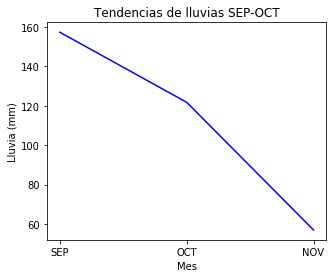

In [106]:
desc=db.describe()

plt.figure(4,figsize=[5,4])
ax1=plt.subplot()

ax1.set_ylabel('Lluvia (mm)');
ax1.set_xlabel('Mes');
ax1.set_title('Tendencias de lluvias SEP-OCT')

plt.plot(['SEP','OCT','NOV'],desc.iloc[1,[5,9,13]],'b-')

Gráfica de tendencias de temperaturaen los meses septiembre, octubre y noviembre de 2019. Se grafican varias líneas en un solo gráfico y se incluye una leyenda para cada color.

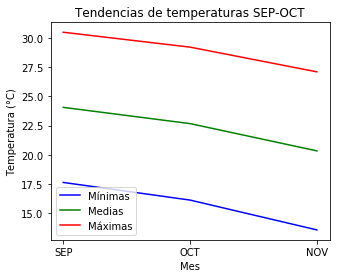

In [107]:
plt.figure(4,figsize=[5,4])
ax1=plt.subplot()

ax1.set_ylabel('Temperatura (°C)');
ax1.set_xlabel('Mes');
ax1.set_title('Tendencias de temperaturas SEP-OCT')

plt.plot(['SEP','OCT','NOV'],desc.iloc[1,[2,6,10]],'b',label='Mínimas')
plt.plot(['SEP','OCT','NOV'],desc.iloc[1,[3,7,11]],'g',label='Medias')
plt.plot(['SEP','OCT','NOV'],desc.iloc[1,[4,8,12]],'r',label='Máximas')

plt.legend()


Grupo de gráficas scatter de temeperaturas vs lluvias, observando estas gráficas se puede concluir que donde más llueve, hay más temperatura. Se usa la función subplot para tener varias gráficas en la misma impresión.

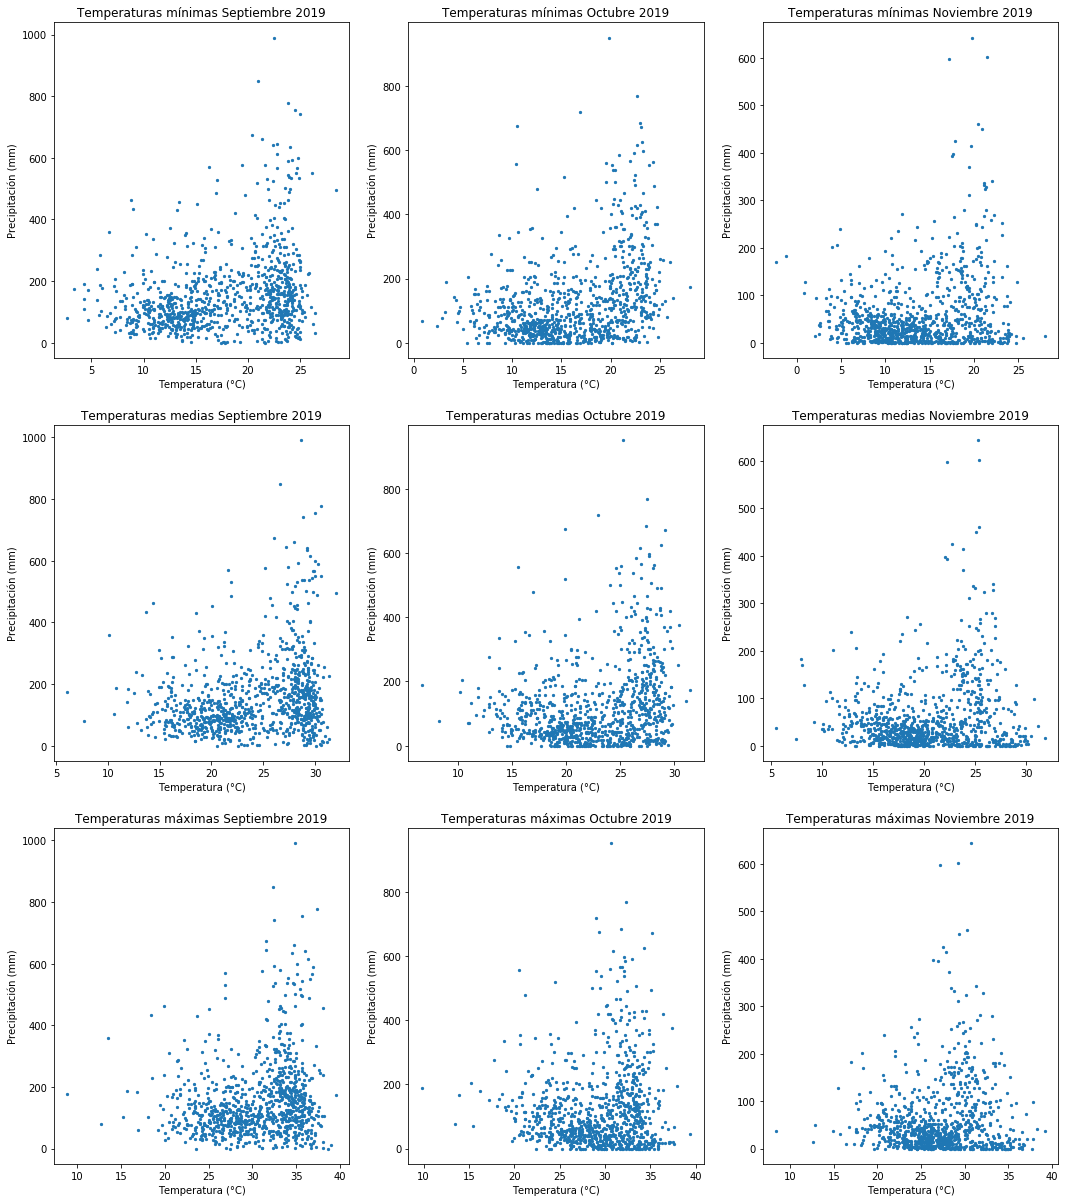

In [108]:
plt.figure(3,figsize=[18,21])
ax1=plt.subplot(3, 3, 1)
plt.scatter(db['SEPTMin'],db['SEPlluv'],s=5,cmap="ocean")
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_title('Temperaturas mínimas Septiembre 2019')

ax1=plt.subplot(3, 3, 2)
plt.scatter(db['OCTTMin'],db['OCTlluv'],s=5,cmap="ocean")
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_title('Temperaturas mínimas Octubre 2019')


ax1=plt.subplot(3, 3, 3)
plt.scatter(db['NOVTMin'],db['NOVlluv'],s=5,cmap="ocean")
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_title('Temperaturas mínimas Noviembre 2019')


ax1=plt.subplot(3, 3, 4)
plt.scatter(db['SEPTMed'],db['SEPlluv'],s=5,cmap="ocean")
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_title('Temperaturas medias Septiembre 2019')


ax1=plt.subplot(3, 3, 5)
plt.scatter(db['OCTTMed'],db['OCTlluv'],s=5,cmap="ocean")
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_title('Temperaturas medias Octubre 2019')

ax1=plt.subplot(3, 3, 6)
plt.scatter(db['NOVTMed'],db['NOVlluv'],s=5,cmap="ocean")
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_title('Temperaturas medias Noviembre 2019')

ax1=plt.subplot(3, 3, 7)
plt.scatter(db['SEPTMax'],db['SEPlluv'],s=5,cmap="ocean")
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_title('Temperaturas máximas Septiembre 2019')


ax1=plt.subplot(3, 3, 8)
plt.scatter(db['OCTTMax'],db['OCTlluv'],s=5,cmap="ocean")
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_title('Temperaturas máximas Octubre 2019')

ax1=plt.subplot(3, 3, 9)
plt.scatter(db['NOVTMax'],db['NOVlluv'],s=5,cmap="ocean")
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_title('Temperaturas máximas Noviembre 2019')



plt.savefig('Scatter.png')


Gráficas de temperaturas mínimas, medias y máximas del mes de septuembre. Se usa las variables de longitud y magnitud para formar un mapa del país con los puntos. Se usa escala de colores para representar la calidez.

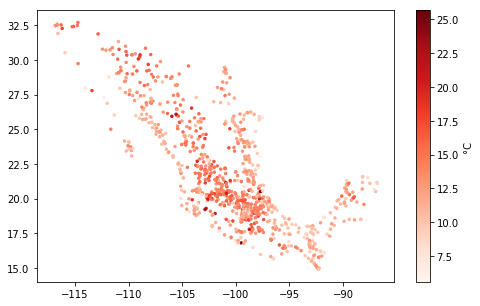

In [109]:
septmin=db['SEPTMin']
septmed=db['SEPTMed']
septmax=db['SEPTMax']-db['SEPTMin']

plt.figure(1,figsize=[8,5])
"""
ax1=plt.subplot(3, 1, 1)
plt.scatter(db['Lon'],db['Lat'],s=6,c=septmin,cmap="Blues")
ax1.set_ylabel('Latitud')
ax1.set_xlabel('Longitud')
ax1.set_title('Temperaturas mínimas Septiembre 2019')
plt.colorbar(label='°C');
ax1=plt.subplot(3, 1, 2)
plt.scatter(db['Lon'],db['Lat'],s=6,c=septmed,cmap="Greens")
ax1.set_ylabel('Latitud')
ax1.set_xlabel('Longitud')
ax1.set_title('Temperaturas medias Septiembre 2019')
plt.colorbar(label='°C');
"""
plt.scatter(db['Lon'],db['Lat'],s=6,c=septmax,cmap="Reds")
ax1.set_ylabel('Latitud')
ax1.set_xlabel('Longitud')
ax1.set_title('Variación de temperatura Septiembre 2019')
plt.colorbar(label='°C');

plt.savefig('variacion.png')

Gráficas de lluvia de septiembre por ubicación en mapa con escala de colores, en el segundo gráfico se remarcan las mediciones altas y bajas. 

In [110]:
lluv1912.shape

(917, 19)

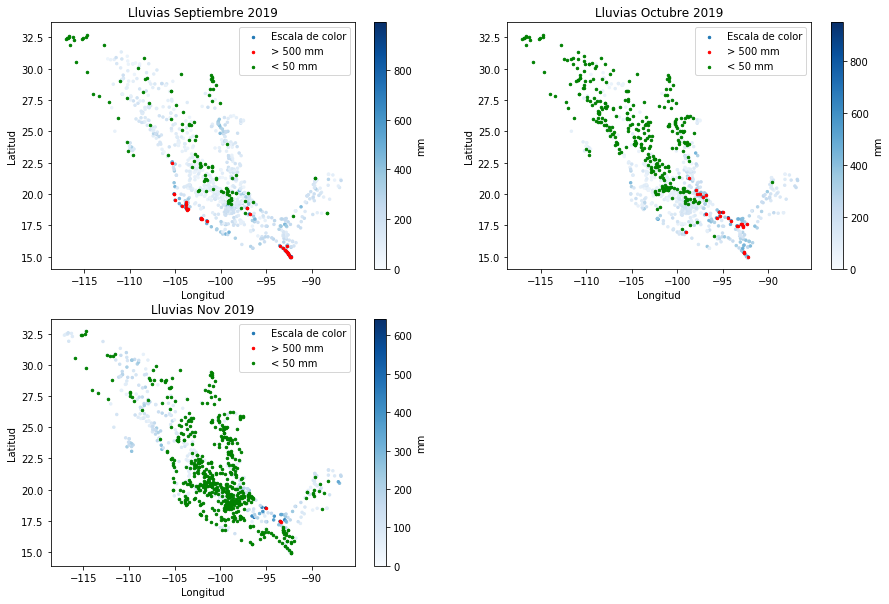

In [111]:
plt.figure(2,figsize=[15,10])
ax1=plt.subplot(2, 2, 1)
seplluv=db.loc[:,['Lon','Lat','SEPlluv']]
fil1 = seplluv[seplluv['SEPlluv'] > 500]
fil2 = seplluv[seplluv['SEPlluv'] < 50]

plt.scatter(db['Lon'],db['Lat'],s=6,c=db['SEPlluv'],cmap="Blues",label='Escala de color')
plt.colorbar(label='mm')
plt.scatter(fil1['Lon'],fil1['Lat'],s=6,c="r",label='> 500 mm')
plt.scatter(fil2['Lon'],fil2['Lat'],s=6,c="g",label='< 50 mm')
ax1.set_ylabel('Latitud')
ax1.set_xlabel('Longitud')
ax1.set_title('Lluvias Septiembre 2019')
ax1.legend()


ax1=plt.subplot(2, 2, 2)
seplluv=db.loc[:,['Lon','Lat','OCTlluv']]
fil1 = seplluv[seplluv['OCTlluv'] > 500]
fil2 = seplluv[seplluv['OCTlluv'] < 50]

plt.scatter(db['Lon'],db['Lat'],s=6,c=db['OCTlluv'],cmap="Blues",label='Escala de color')
plt.colorbar(label='mm')
plt.scatter(fil1['Lon'],fil1['Lat'],s=6,c="r",label='> 500 mm')
plt.scatter(fil2['Lon'],fil2['Lat'],s=6,c="g",label='< 50 mm')
ax1.set_ylabel('Latitud')
ax1.set_xlabel('Longitud')
ax1.set_title('Lluvias Octubre 2019')
ax1.legend()


ax1=plt.subplot(2, 2, 3)
seplluv=db.loc[:,['Lon','Lat','NOVlluv']]
fil1 = seplluv[seplluv['NOVlluv'] > 500]
fil2 = seplluv[seplluv['NOVlluv'] < 50]

plt.scatter(db['Lon'],db['Lat'],s=6,c=db['NOVlluv'],cmap="Blues",label='Escala de color')
plt.colorbar(label='mm')
plt.scatter(fil1['Lon'],fil1['Lat'],s=6,c="r",label='> 500 mm')
plt.scatter(fil2['Lon'],fil2['Lat'],s=6,c="g",label='< 50 mm')
ax1.set_ylabel('Latitud')
ax1.set_xlabel('Longitud')
ax1.set_title('Lluvias Nov 2019')
ax1.legend()

plt.savefig('lluv.png')

In [139]:
smin=db.loc[:,['Lon','Lat','SEPTMin']]
fil1 = smin[smin['SEPTMin'] < 10]

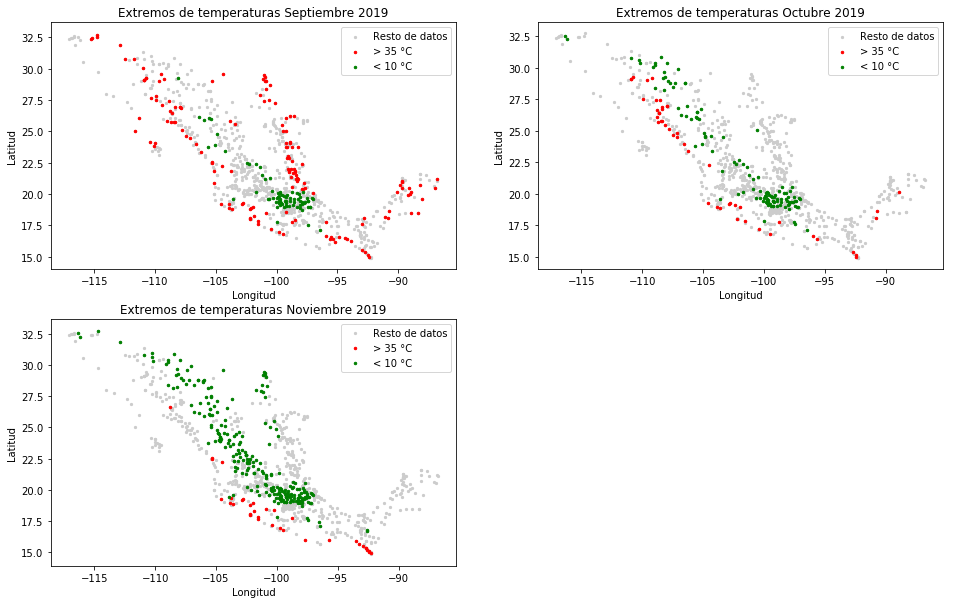

In [157]:
smax=db.loc[:,['Lon','Lat','SEPTMax']]
smin=db.loc[:,['Lon','Lat','SEPTMin']]

fil1 = smax[smax['SEPTMax'] > 35]
fil2 = smin[smin['SEPTMin'] < 10]

omax=db.loc[:,['Lon','Lat','OCTTMax']]
omin=db.loc[:,['Lon','Lat','OCTTMin']]

fil3 = omax[omax['OCTTMax'] > 35]
fil4 = omin[omin['OCTTMin'] < 10]

nmax=db.loc[:,['Lon','Lat','NOVTMax']]
nmin=db.loc[:,['Lon','Lat','NOVTMin']]

fil5 = nmax[nmax['NOVTMax'] > 35]
fil6 = nmin[nmin['NOVTMin'] < 10]

plt.figure(1,figsize=[16,10])
ax1=plt.subplot(2, 2, 1)
plt.scatter(db['Lon'],db['Lat'],s=5,c='#cccccc',label='Resto de datos')
plt.scatter(fil1['Lon'],fil1['Lat'],s=6,c="r",label='> 35 °C')
plt.scatter(fil2['Lon'],fil2['Lat'],s=6,c="g",label='< 10 °C')
ax1.set_ylabel('Latitud')
ax1.set_xlabel('Longitud')
ax1.set_title('Extremos de temperaturas Septiembre 2019')
plt.legend()

ax1=plt.subplot(2, 2, 2)
plt.scatter(db['Lon'],db['Lat'],s=5,c='#cccccc',label='Resto de datos')
plt.scatter(fil3['Lon'],fil3['Lat'],s=6,c="r",label='> 35 °C')
plt.scatter(fil4['Lon'],fil4['Lat'],s=6,c="g",label='< 10 °C')
ax1.set_ylabel('Latitud')
ax1.set_xlabel('Longitud')
ax1.set_title('Extremos de temperaturas Octubre 2019')
plt.legend()


ax1=plt.subplot(2, 2, 3)
plt.scatter(db['Lon'],db['Lat'],s=5,c='#cccccc',label='Resto de datos')
plt.scatter(fil5['Lon'],fil5['Lat'],s=6,c="r",label='> 35 °C')
plt.scatter(fil6['Lon'],fil6['Lat'],s=6,c="g",label='< 10 °C')
ax1.set_ylabel('Latitud')
ax1.set_xlabel('Longitud')
ax1.set_title('Extremos de temperaturas Noviembre 2019')
plt.legend()

plt.savefig('ext.png')

Scatters de temperaturas vs lluvia, se puede ver una tendencia a que los lugares en donde más llueve són más cálidos.

Intento de empalmar con imagen de silueta de México.

Gráficos de sueldos por nivel de empleado

In [18]:
sueldos=tabulador.loc[:,['NIVEL','SUELDO BASE','SUELDO MENSUAL BRUTO','SUELDO MENSUAL NETO']]

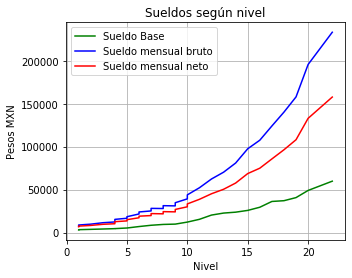

In [19]:
plt.figure(4,figsize=[5,4])
ax1=plt.subplot()

ax1.set_ylabel('Pesos MXN');
ax1.set_xlabel('Nivel');
ax1.set_title('Sueldos según nivel')

plt.plot(sueldos['NIVEL'],sueldos['SUELDO BASE'],'g',label='Sueldo Base')
plt.plot(sueldos['NIVEL'],sueldos['SUELDO MENSUAL BRUTO'],'b',label='Sueldo mensual bruto')
plt.plot(sueldos['NIVEL'],sueldos['SUELDO MENSUAL NETO'],'r',label='Sueldo mensual neto')

ax1.grid('on')

plt.legend()


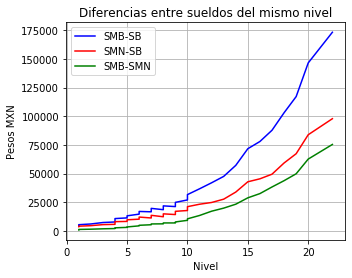

In [20]:
plt.figure(4,figsize=[5,4])
ax1=plt.subplot()

ax1.set_ylabel('Pesos MXN');
ax1.set_xlabel('Nivel');
ax1.set_title('Diferencias entre sueldos del mismo nivel')


plt.plot(sueldos['NIVEL'],sueldos['SUELDO MENSUAL BRUTO']-sueldos['SUELDO BASE'],'b',label='SMB-SB')
plt.plot(sueldos['NIVEL'],sueldos['SUELDO MENSUAL NETO']-sueldos['SUELDO BASE'],'r',label='SMN-SB')
plt.plot(sueldos['NIVEL'],sueldos['SUELDO MENSUAL BRUTO']-sueldos['SUELDO MENSUAL NETO'],'g',label='SMB-SMN')

ax1.grid('on')

plt.legend()
